# Домашее задание №3

## Задание 1

В файле Worldbank_tech.xlsx содержаться данные Всемирного банка по ряду показателей за 2015 год. В файле следующие переменные:
    
    - country_name: Country Name
    - country_code: Country Code
    - internet: Internet users (per 100 people)
    - secure: Secure Internet servers (per 1 million people)
    - export: Communications, computer, etc. (% of service exports)
    - import: Communications, computer, etc. (% of service imports)
    - telephone: Fixed telephone subscriptions (per 100 people)
    - hightech: High-technology exports (current US$)
    - mobile: Mobile cellular subscriptions (per 100 people)
    

Проведите иерархический кластерный анализ данных с использованием не менее 4-х метрических переменных. Выполните следующие пункты:

1.	Выберите оптимальный алгоритм кластеризации и обоснуйте свой выбор.


2.	Создайте дендрограмму, опишите её.


3.	Определите число кластеров, объясните своё решение.


4.	Опишите получившиеся кластеры на основе описательной статистки. Нужно не просто рассчитать статистики в таблицах, но детально описать полученные результаты.


5.	Дайте названия кластерам и обоснуйте их.


6.	Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?

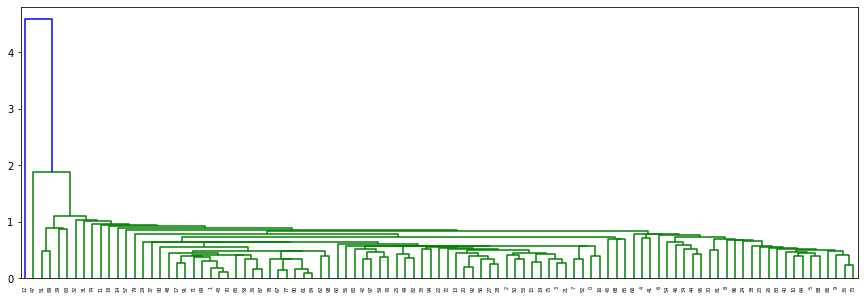

In [9]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


df = pd.read_excel('Worldbank_tech.xlsx')
df = df.dropna()
metric_vars = ['internet', 'secure', 'telephone', 'mobile']
for i in metric_vars:
    df['z_' + i] = (df[i] - df[i].mean()) / df[i].std()

metric_vars_norm = list(map(lambda x: 'z_' + x, metric_vars))
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df[metric_vars_norm], 'single'))



In [10]:
from sklearn.metrics import calinski_harabasz_score
Z = linkage(df[metric_vars_norm], method='ward', metric='euclidean') 

for k in range (2, 10):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(df[metric_vars_norm], labels)))

Число кластеров: 2, индекс 57.55697345701384
Число кластеров: 3, индекс 59.63494326175003
Число кластеров: 4, индекс 59.65229280948813
Число кластеров: 5, индекс 55.6469384584428
Число кластеров: 6, индекс 53.04627324337107
Число кластеров: 7, индекс 53.614828964197585
Число кластеров: 8, индекс 54.48373711223874
Число кластеров: 9, индекс 55.48139162166415


In [11]:
# Максимальное расстояние при 4-х кластерах
k = 4
df['cluster_labels'] = fcluster(Z, t=k, criterion='maxclust')
result = pd.DataFrame(df.groupby('cluster_labels').size())

for i in metric_vars_norm:
    result[i] =  df.groupby('cluster_labels')[i].mean()

result

,0,z_internet,z_secure,z_telephone,z_mobile
cluster_labels,,,,,
1,35,0.862643,0.651314,1.109262,0.041555
2,1,1.507739,6.430787,-0.290229,-2.011035
3,29,-1.163026,-0.537568,-0.937134,-0.873415
4,34,0.059633,-0.401097,-0.334032,0.761343


### Кластер 1
Число пользователей интернета и безопасных серверов выше среднего, число пользователей мобильных телефонов выше среднего более чем в два раза, число мобильных телефонов среднее

### Кластер 2


## Задание 2

В файле Video_Games_Sales.csv содержаться данные о продажах видеоигр.
Источник: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

В файле следующие переменные::
    
    - Name: The game’s name
    - Platform: Platform of the game’s release (i.e. PC, PS4, etc.)
    - Year_of_Release: Year of the game's release
    - Genre: Genre of the game
    - Publisher: Publisher of the game
    - NA_Sales: Sales in North America (in millions)
    - EU_Sales: Sales in Europe (in millions)
    - JP_Sales: Sales in Japan (in millions)
    - Other_Sales: Sales in the rest of the world (in millions)
    - Global_Sales: Total worldwide sales.
    - Critic_score: Aggregate score compiled by Metacritic staff
    - Criticcount: The number of critics used in coming up with the Criticscore
    - User_score: Score by Metacritic's subscribers
    - Usercount: Number of users who gave the userscore
    - Developer: Party responsible for creating the game
    - Rating: The ESRB ratings


Проведите кластерный анализ по методу k-средних с использованием не менее 4-х метрических переменных. Выполните следующие пункты:

1.	Определите число кластеров, объясните своё решение.


2.	Опишите получившиеся кластеры с помощью описательной статистки. Нужно не просто рассчитать статистики в таблицах, но детально описать полученные результаты.


3.	Дайте названия кластерам и обоснуйте их.


4.	Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?


In [12]:
df = pd.read_csv('video_games_sales.csv')
metric_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Critic_Score', 'User_Score']
for  i in metric_vars:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    df = df.dropna(subset=[i])
metric_vars_norm = []
for i in metric_vars:
    df['z_' + i] = (df[i] - df[i].mean()) / df[i].std()
    metric_vars_norm.append('z_' + i)

In [13]:
from sklearn.cluster import KMeans

X = df[metric_vars_norm]
for k in range (2, 15):
    labels = KMeans(n_clusters=k).fit_predict(X)
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(X, labels)))


Число кластеров: 2, индекс 2080.8529655241987
Число кластеров: 3, индекс 2687.5921698336247
Число кластеров: 4, индекс 2667.3562679029387
Число кластеров: 5, индекс 2594.514727133762
Число кластеров: 6, индекс 2619.3655385261122
Число кластеров: 7, индекс 2608.6248090092345
Число кластеров: 8, индекс 2609.9007642170736
Число кластеров: 9, индекс 2628.7076951185513
Число кластеров: 10, индекс 2679.0881635029605
Число кластеров: 11, индекс 2711.5237887090607
Число кластеров: 12, индекс 2648.5803061475744
Число кластеров: 13, индекс 2611.9671193016843
Число кластеров: 14, индекс 2563.7324967936543


In [14]:

# Берем 11 кластеров
kmeans_model = KMeans(n_clusters=11).fit_predict(X)
df['Clusters'] = kmeans_model
result = pd.DataFrame(df.groupby('Clusters').size())
for i in metric_vars_norm:
    result[i] =  df.groupby('Clusters')[i].mean()

result




,0,z_NA_Sales,z_EU_Sales,z_JP_Sales,z_Critic_Score,z_User_Score
Clusters,,,,,,
0,146,0.666528,0.593438,2.980870,0.761149,0.730751
1,1022,-0.239355,-0.230214,-0.168024,-1.276843,-0.577781
2,9,11.591904,13.093993,13.706379,0.734449,0.521013
3,1935,-0.225200,-0.211158,-0.122689,-0.194996,0.396228
4,350,1.588237,1.430093,0.042903,0.959725,0.368631
5,427,-0.262435,-0.233919,-0.204968,-1.969226,-2.457057
6,1,42.809330,42.294583,13.045566,0.414259,0.567269
7,2102,-0.080955,-0.092762,-0.099754,0.858065,0.718846
8,965,-0.108759,-0.088089,-0.165228,0.198205,-0.921157


Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 23:55 2 ноября.